## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [47]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
#2 Check the shape of the DataFrame (rows, columns)

print("Shape of the DataFrame : " , df.shape)

Shape of the DataFrame :  (545, 13)


In [49]:
#3 Look at the data types of the columns

print("Data types of the df : " ,df.dtypes)

Data types of the df :  price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [50]:
#4 Check for missing  values if any, replace with appropriate values

print("Missing values : ", df.isnull().sum())

Missing values :  price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [51]:
#5 Prepare  X (independent variables) and y (dependent variable)

x = df.drop(columns=["price"])
y = df["price"]



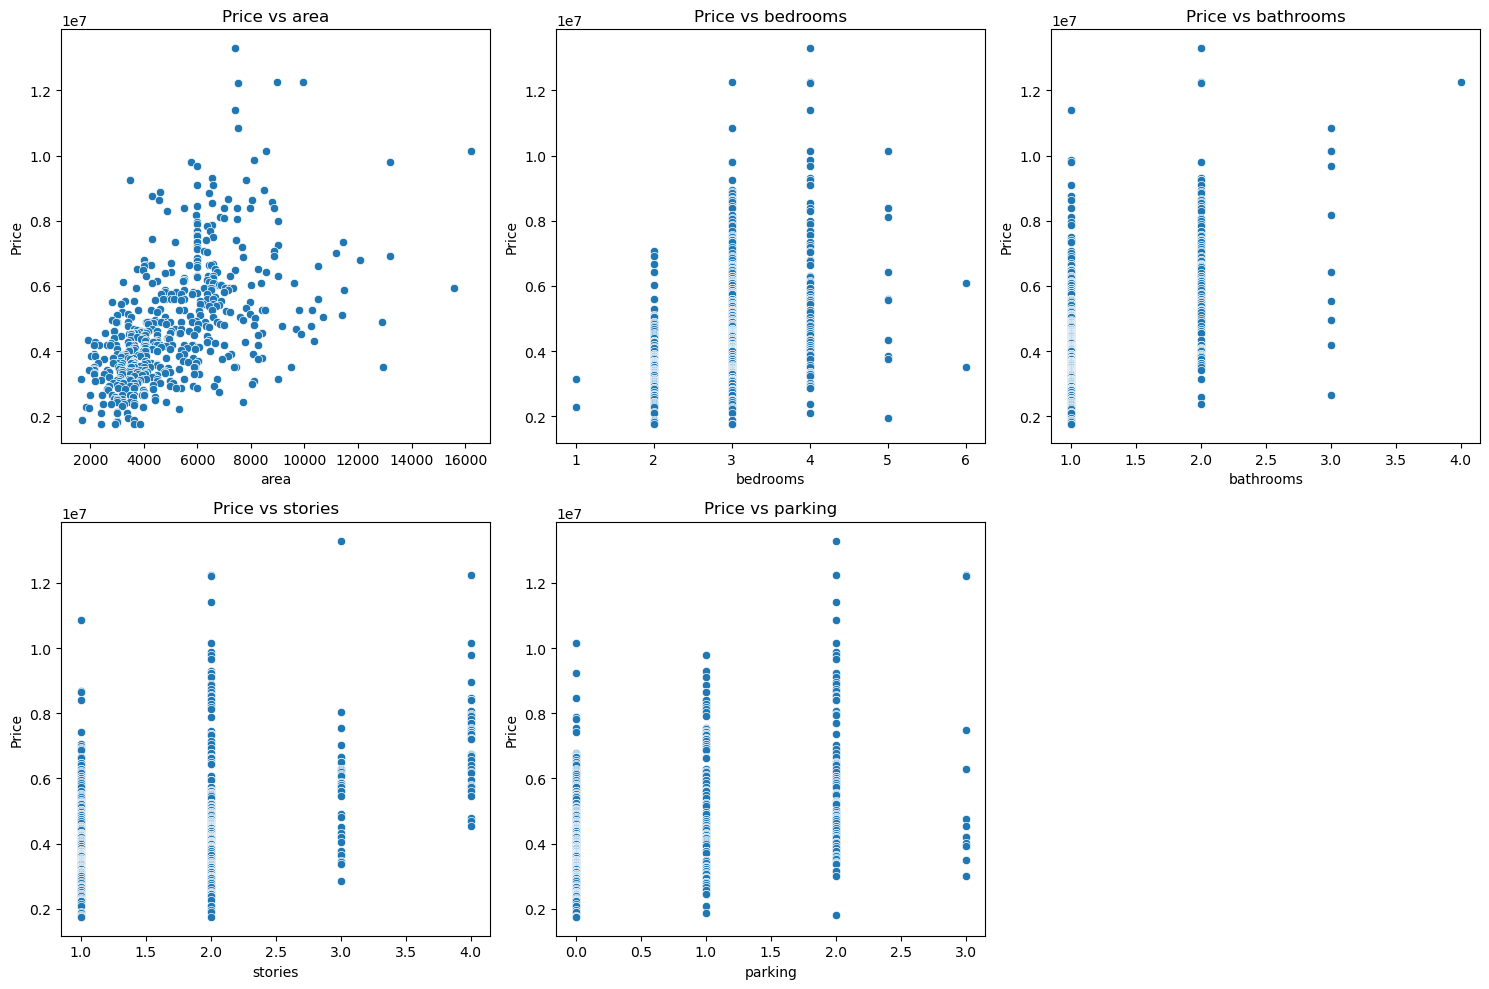

In [64]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots


import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical independent variables
independent_vars = ["area", "bedrooms", "bathrooms", "stories", "parking"]

# Create scatterplots for each independent variable vs. price
plt.figure(figsize=(15, 10))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df["price"])
    plt.xlabel(var)
    plt.ylabel("Price")
    plt.title(f"Price vs {var}")

plt.tight_layout()
plt.show()



In [53]:
#7 Encoding categorical data in X

from sklearn.preprocessing import LabelEncoder

# List the categorical columns you want to encode.
categorical_cols = df.select_dtypes(include="object").columns

# Apply LabelEncoder to each categorical column in X.
for col in categorical_cols:
    le = LabelEncoder()
    x.loc[:, col] = le.fit_transform(x[col])

print("Encoded x dependent variables : ", x)


Encoded x dependent variables :       area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3        1         0        0   
1    8960         4          4        4        1         0        0   
2    9960         3          2        2        1         0        1   
3    7500         4          2        2        1         0        1   
4    7420         4          1        2        1         1        1   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1        1         0        1   
541  2400         3          1        1        0         0        0   
542  3620         2          1        1        1         0        0   
543  2910         3          1        1        0         0        0   
544  3850         3          1        2        1         0        0   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                 0               1      

In [54]:
#8  Avoiding the Dummy Variable Trap

In [55]:
#9 Apply feature scaling on numerical variables

from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include="number").columns
numerical_cols = [col for col in numerical_cols if "price" not in col]

scaler = StandardScaler()

x.loc[:,numerical_cols] = scaler.fit_transform(x[numerical_cols])


print(x.head())



       area  bedrooms  bathrooms   stories mainroad guestroom basement  \
0  1.046726  1.403419   1.421812  1.378217        1         0        0   
1  1.757010  1.403419   5.405809  2.532024        1         0        0   
2  2.218232  0.047278   1.421812  0.224410        1         0        1   
3  1.083624  1.403419   1.421812  0.224410        1         0        1   
4  1.046726  1.403419  -0.570187  0.224410        1         1        1   

  hotwaterheating airconditioning   parking prefarea furnishingstatus  
0               0               1  1.517692        1                0  
1               0               1  2.679409        0                0  
2               0               0  1.517692        1                1  
3               0               1  2.679409        1                0  
4               0               1  1.517692        0                0  


In [56]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

from sklearn.model_selection import train_test_split

x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [57]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression


# Create an instance of the LinearRegression model.
model = LinearRegression()

# Fit the model on the training data (X_train and y_train)
model.fit(x_train, y_train)

# Output the model's intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 4071726.9232334415
Coefficients: [ 548676.87299684   61007.57353683  560930.5907925   360373.26651063
  408320.46478164  279534.04145787  484980.21525134  619934.34714776
  680006.92089594  261749.09078536  509441.46380309 -198031.32519469]


In [58]:
#12 Predict on the train set and calculate the error = y_pred - y_train

# Predict on the train set
y_pred_train = model.predict(x_train)

# Calculate the error
error_train = y_pred_train - y_train

# Display the first few errors
print(error_train.head())

126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
Name: price, dtype: float64


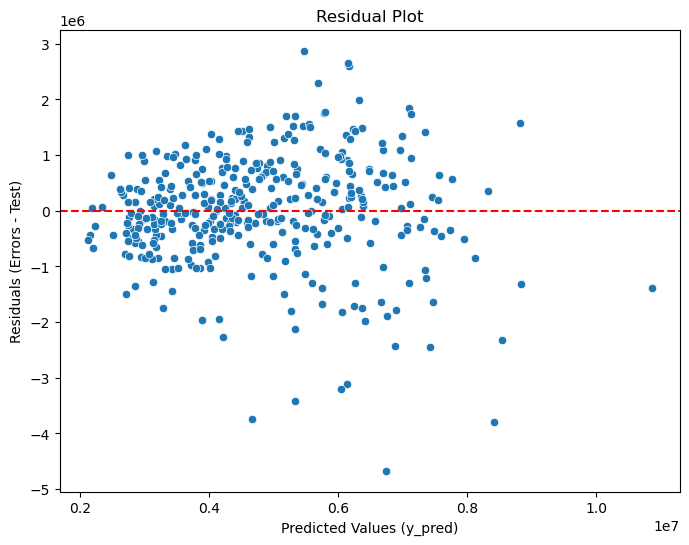

In [59]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

# Plot residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_train, y=error_train)
plt.axhline(y=0, color='red', linestyle='dashed')  # Reference line at y = 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors - Test)")
plt.title("Residual Plot")
plt.show()

In [60]:
#14  Predic on the test set

# Predict on the train set
y_pred_test = model.predict(x_test)

# Calculate the error
error_test = y_pred_test - y_test

# Display the first few errors
print(error_test.head())

316    1.347509e+06
77     4.471855e+05
360   -6.545376e+05
90    -1.963055e+06
493    5.159837e+05
Name: price, dtype: float64


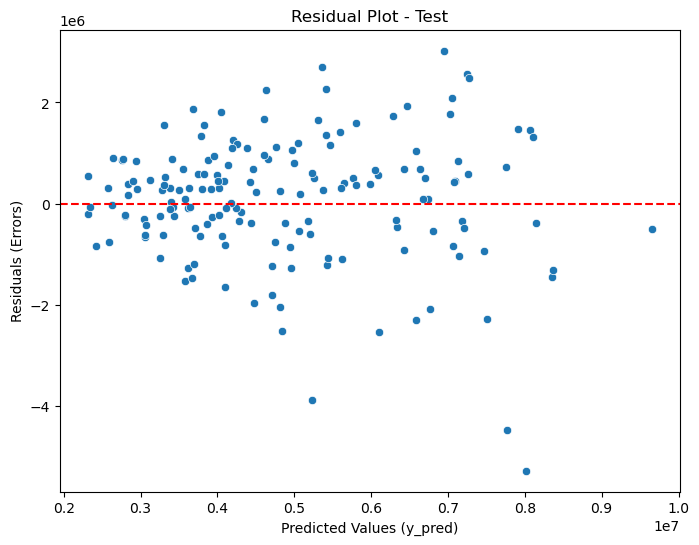

In [61]:
#15 Residual plot - plot y_pred in x axis and errors in y axis


# Plot residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test, y=error_test)
plt.axhline(y=0, color='red', linestyle='dashed')  # Reference line at y = 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Test")
plt.show()

In [62]:
#16 Print Mean Squared Error and R Squared Value

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_train)

# Calculate R-Squared (R²) Score
r2 = r2_score(y_train, y_pred_train)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²) Value: {r2:.4f}")


Mean Squared Error (MSE): 965153171508.67
R-Squared (R²) Value: 0.6928


In [63]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)


# Function to calculate Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# Try different feature sets (removing some features for comparison)
feature_sets = [
    ["area", "bedrooms", "bathrooms"],  # Set 1 (Basic)
    ["area", "bedrooms", "bathrooms", "stories"],  # Set 2 (Adding 'stories')
    ["area", "bedrooms", "bathrooms", "stories", "parking"],  # Set 3 (Adding 'parking')
    x.columns.tolist()  # All features (Current full model)
]

# Store results
results = []

for features in feature_sets:
    X_subset = x[features]  # Select feature subset
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    
    r2 = r2_score(y_train, y_pred_train)
    adj_r2 = adjusted_r2(r2, X_train.shape[0], len(features))
    
    
    results.append({"Features": features, "R²": r2, "Adjusted R²": adj_r2})

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)


                                            Features        R²  Adjusted R²
0                        [area, bedrooms, bathrooms]  0.493825     0.490310
1               [area, bedrooms, bathrooms, stories]  0.538804     0.534524
2      [area, bedrooms, bathrooms, stories, parking]  0.562168     0.557077
3  [area, bedrooms, bathrooms, stories, mainroad,...  0.685443     0.676519
